In [11]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal, fftpack
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'real.csv')
df2 = pd.read_csv(r'sim.csv')
df3 = (df1+df2)/2

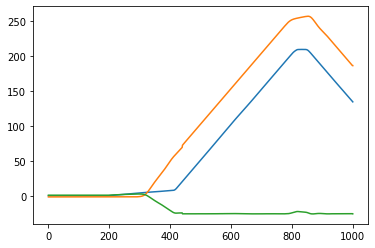

In [12]:
plt.plot(df1.x, df1.y, df2.x, -df2.y, df3.x, df3.y)

-1


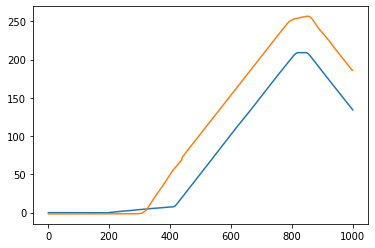

In [13]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df2.y)
print (shft01)
plt.figure()
plt.plot(df1.x, df1.y,
         df2.x.shift(-shft01), -df2.y)
fig = plt.gcf()

In [14]:
xcor = np.correlate(df1.y, -df2.y, "full")
print (xcor)
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here
print (nR)
print(maxLag)

[  -7.73062897  -15.6687416   -23.84531738 ... -666.98794262 -443.83174901
 -221.5023396 ]
16088355.917277806
999


In [15]:
print(shift)

673.0


688.0
673.0


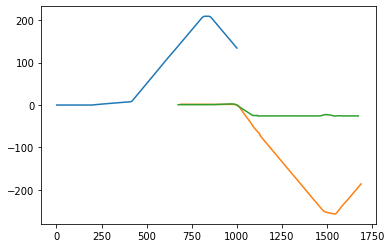

In [16]:
plt.plot(df1.x, df1.y)
for target in [df2, df3]:
    dx = np.mean(np.diff(df1.x.values))
    shift = (np.argmax(signal.correlate(df1.y, target.y)) - (len(target.y)-1)) * dx
    print(shift)
    plt.plot(target.x + shift, target.y)

-1


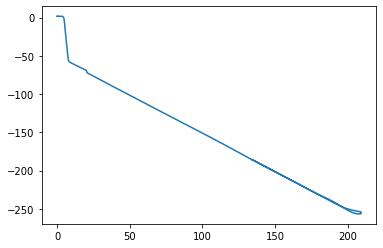

In [17]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df1.y)
print (shft01)
plt.figure()
plt.plot(df1.y, df2.y)
fig = plt.gcf()

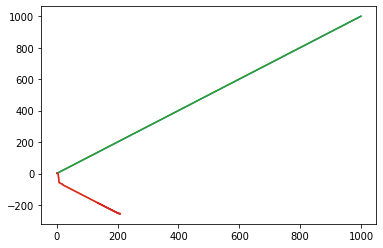

In [18]:
plt.figure()
plt.plot(df1, df2,
         df1.shift(-shft01), df2)
fig = plt.gcf()

Now we're going to try using a FFT comparison

In [19]:
a = np.array(df1.y)
b = np.array(-df2.y)
orrfirst = signal.correlate(a,b)
corrsecond = signal.correlate(b,a)
xcor = np.correlate(a, b, "full")
nR = max(corrfirst)
maxLag = np.argmax(corrfirst)  # I imported numpy as np here
print("nR", nR, "Lag", maxLag)
plt.figure()
plt.plot(df1.x, df1.y,
         df2.x.shift(maxLag), -df2.y, df2.x, -df2.y)
fig = plt.gcf()

NameError: name 'corrfirst' is not defined

In [20]:
A = fftpack.fft(a)
B = fftpack.fft(b)
Ar = -A.conjugate()
Br = -B.conjugate()
first = np.argmax(np.abs(fftpack.ifft(Ar*B)))
second = np.argmax(np.abs(fftpack.ifft(A*Br)))
print (first)
print (second)

0
0


Now we'll do it without the FFT

nR 88 Lag 16
Dataframe B     0
0   0
1   0
2   0
3   0
4   0
5   1
6   2
7   3
8   4
9   3
10  2
11  1
12  0
13  1
14  2
15  3
16  4
17  3
18  2
19  1
20  0
padding
b1    0
0  0
1  0
2  0
3  0
Rotated
    0
0   1
1   2
2   3
3   4
4   3
5   2
6   1
7   0
8   1
9   2
10  3
11  4
12  3
13  2
14  1
15  0


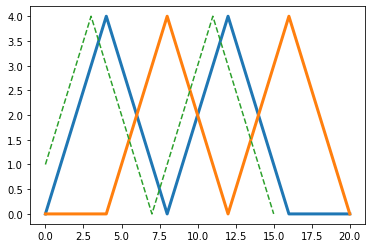

In [184]:
a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])
corrfirst = signal.correlate(a,b)
corrsecond = signal.correlate(b,a)
xcor = np.correlate(a, b, "full")
nR = max(corrfirst)
maxLag = np.argmax(corrfirst)  # I imported numpy as np here
print("nR", nR, "Lag", maxLag)

first = np.argmax(signal.correlate(a,b))
second = np.argmax(signal.correlate(b,a))
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here
a = pd.DataFrame(a)
b = pd.DataFrame(b)
print("Dataframe B", b)
print("padding")
b1 = b[0:4]
b2 = b[5:]
b2.append(b1, ignore_index=False, sort = True)
b2.reset_index(drop=True, inplace = True)
print("b1",b1)
print ("Rotated")
print(b2)

plt.figure()
plt.plot(a, linewidth=3)
plt.plot(b, linewidth=3)
plt.plot(b2, linestyle='dashed')
#plt.plot(a.shift(maxLag))



b1 =     0
0  0
1  0
2  0
3  0
b2 =     0
5   1
6   2
7   3
8   4
9   3
10  2
11  1
12  0
13  1
14  2
15  3
16  4
17  3
18  2
19  1
20  0
Rotated     0
0   1
1   2
2   3
3   4
4   3
5   2
6   1
7   0
8   1
9   2
10  3
11  4
12  3
13  2
14  1
15  0
16  0
17  0
18  0
19  0
      0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   0.0
6   0.0
7   0.0
8   0.0
9   0.0
10  1.0
11  2.0
12  3.0
13  4.0
14  3.0
15  2.0
16  1.0
17  0.0
18  1.0
19  2.0
20  3.0 end
16
24
31
45


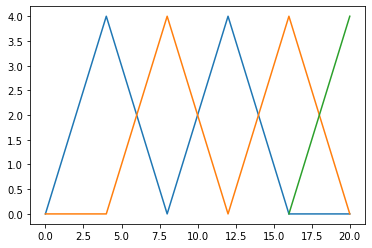

In [39]:
fig = plt.gcf()
print(first)
print(second)
df1 = pd.read_csv(r'real2.csv')
df2 = pd.read_csv(r'sim2.csv')
a = np.array(df1)
b = np.array(-df2)
first = np.argmax(signal.correlate(a,b))
second = np.argmax(signal.correlate(b,a))
print(first)
print(second)

In [88]:
af = scipy.fft.fft(a)
bf = scipy.fft.fft(b)
c = scipy.fft.ifft(af * np.conj(bf))

time_shift = np.argmax(abs(c))
print(time_shift)

0
